In [1]:
import os
import sys
os.environ["PYSPARK_PYTHON"] = sys.executable
os.environ["PYSPARK_DRIVER_PYTHON"] = sys.executable

In [2]:
from pyspark import SparkContext
sc = SparkContext(master="local[4]")
sc.version

'2.3.0'

In [3]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import Row, StructField, StructType, StringType, IntegerType, BinaryType

sqlContext = SQLContext(sc)
sqlContext

In [4]:
#read in the dataset

In [5]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("CSV Reader").getOrCreate()

In [6]:
df1 = spark.read.format("csv").option("header", "true").option("inferSchema", "true").option("escape", "\"").load("merged_data.csv")

In [7]:
#df = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("merged_data.csv")
#df.show()

In [8]:
#return schema for database

In [9]:
df1.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- rank: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- url: string (nullable = true)
 |-- region: string (nullable = true)
 |-- chart: string (nullable = true)
 |-- trend: string (nullable = true)
 |-- streams: integer (nullable = true)
 |-- track_id: string (nullable = true)
 |-- album: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- duration_ms: integer (nullable = true)
 |-- explicit: boolean (nullable = true)
 |-- release_date: string (nullable = true)
 |-- available_markets: string (nullable = true)
 |-- af_danceability: double (nullable = true)
 |-- af_energy: double (nullable = true)
 |-- af_key: integer (nullable = true)
 |-- af_loudness: double (nullable = true)
 |-- af_mode: integer (nullable = true)
 |-- af_speechiness: double (nullable = true)
 |-- af_acousticness: double (nullable = true)
 |-- af_instrumentalnes

In [10]:
#return all columns 

In [11]:
df1.columns

['_c0',
 'title',
 'rank',
 'date',
 'artist',
 'url',
 'region',
 'chart',
 'trend',
 'streams',
 'track_id',
 'album',
 'popularity',
 'duration_ms',
 'explicit',
 'release_date',
 'available_markets',
 'af_danceability',
 'af_energy',
 'af_key',
 'af_loudness',
 'af_mode',
 'af_speechiness',
 'af_acousticness',
 'af_instrumentalness',
 'af_liveness',
 'af_valence',
 'af_tempo',
 'af_time_signature']

In [12]:
#return count of all records in the dataframe 

In [13]:
df1.count()

1048575

In [14]:
#check to see if any null values  
#we have a lot of null values, particularly in the streams column
#drop null values 

In [15]:
df2 = df1.dropna("any")
df2.show()

+---+--------------------+----+--------+--------------------+--------------------+---------+------+-------------+-------+--------------------+--------------------+----------+-----------+--------+------------+--------------------+---------------+---------+------+-----------+-------+--------------+---------------+-------------------+-----------+----------+--------+-----------------+
|_c0|               title|rank|    date|              artist|                 url|   region| chart|        trend|streams|            track_id|               album|popularity|duration_ms|explicit|release_date|   available_markets|af_danceability|af_energy|af_key|af_loudness|af_mode|af_speechiness|af_acousticness|af_instrumentalness|af_liveness|af_valence|af_tempo|af_time_signature|
+---+--------------------+----+--------+--------------------+--------------------+---------+------+-------------+-------+--------------------+--------------------+----------+-----------+--------+------------+--------------------+---

In [16]:
df2.count()

881194

In [17]:
#check for duplicates 
#this means that there are no duplicates among the columns, we are good to go 

In [18]:
from pyspark.sql.functions import count, col

In [19]:
duplicates = df2.groupBy(df2.columns)\
    .agg(count("*").alias("count"))\
    .filter(col("count") > 1)

In [20]:
duplicates.show()

+---+-----+----+----+------+---+------+-----+-----+-------+--------+-----+----------+-----------+--------+------------+-----------------+---------------+---------+------+-----------+-------+--------------+---------------+-------------------+-----------+----------+--------+-----------------+-----+
|_c0|title|rank|date|artist|url|region|chart|trend|streams|track_id|album|popularity|duration_ms|explicit|release_date|available_markets|af_danceability|af_energy|af_key|af_loudness|af_mode|af_speechiness|af_acousticness|af_instrumentalness|af_liveness|af_valence|af_tempo|af_time_signature|count|
+---+-----+----+----+------+---+------+-----+-----+-------+--------+-----+----------+-----------+--------+------------+-----------------+---------------+---------+------+-----------+-------+--------------+---------------+-------------------+-----------+----------+--------+-----------------+-----+
+---+-----+----+----+------+---+------+-----+-----+-------+--------+-----+----------+-----------+--------+

In [21]:
#change data type for streams, popularity and duration_ms from string to integer

In [22]:
df2.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- rank: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- url: string (nullable = true)
 |-- region: string (nullable = true)
 |-- chart: string (nullable = true)
 |-- trend: string (nullable = true)
 |-- streams: integer (nullable = true)
 |-- track_id: string (nullable = true)
 |-- album: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- duration_ms: integer (nullable = true)
 |-- explicit: boolean (nullable = true)
 |-- release_date: string (nullable = true)
 |-- available_markets: string (nullable = true)
 |-- af_danceability: double (nullable = true)
 |-- af_energy: double (nullable = true)
 |-- af_key: integer (nullable = true)
 |-- af_loudness: double (nullable = true)
 |-- af_mode: integer (nullable = true)
 |-- af_speechiness: double (nullable = true)
 |-- af_acousticness: double (nullable = true)
 |-- af_instrumentalnes

In [23]:
#change data types from string to integer

In [24]:
df2 = df2.withColumn("streams", df1["streams"].cast("Integer"))

In [25]:
df2 = df2.withColumn("popularity", df1["popularity"].cast("Integer"))

In [26]:
df2 = df2.withColumn("duration_ms", df1["duration_ms"].cast("Integer"))

In [27]:
df2.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- rank: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- url: string (nullable = true)
 |-- region: string (nullable = true)
 |-- chart: string (nullable = true)
 |-- trend: string (nullable = true)
 |-- streams: integer (nullable = true)
 |-- track_id: string (nullable = true)
 |-- album: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- duration_ms: integer (nullable = true)
 |-- explicit: boolean (nullable = true)
 |-- release_date: string (nullable = true)
 |-- available_markets: string (nullable = true)
 |-- af_danceability: double (nullable = true)
 |-- af_energy: double (nullable = true)
 |-- af_key: integer (nullable = true)
 |-- af_loudness: double (nullable = true)
 |-- af_mode: integer (nullable = true)
 |-- af_speechiness: double (nullable = true)
 |-- af_acousticness: double (nullable = true)
 |-- af_instrumentalnes

In [28]:
#descriptive statistics for streams popularity and duration ms

In [29]:
df2.select("streams", "popularity", "duration_ms").describe().show()

+-------+-----------------+------------------+------------------+
|summary|          streams|        popularity|       duration_ms|
+-------+-----------------+------------------+------------------+
|  count|           881194|            881194|            881194|
|   mean|51662.10985322188|41.246040032047425|216176.87010465347|
| stddev|199992.0502176531| 32.81812068147051| 56106.56857221959|
|    min|             1001|                 0|                 0|
|    max|          7985803|                90|           9318296|
+-------+-----------------+------------------+------------------+



In [30]:
#descriptive statistics for #af numerical values 

In [98]:
df2.select("af_speechiness", "af_instrumentalness", "af_liveness", "af_valence", "af_tempo").describe().show()

+-------+-------------------+--------------------+-------------------+-------------------+------------------+
|summary|     af_speechiness| af_instrumentalness|        af_liveness|         af_valence|          af_tempo|
+-------+-------------------+--------------------+-------------------+-------------------+------------------+
|  count|             881194|              881194|             881194|             881194|            881194|
|   mean| 0.1036562745547574|0.007402772556520002| 0.1666076523444272| 0.5157139318924048|120.42735367127528|
| stddev|0.09284140512009223| 0.06087904450319127|0.12424479466780335|0.22296872218563127| 29.21653759331071|
|    min|              0.022|                 0.0|             0.0176|             0.0306|            31.262|
|    max|              0.955|               0.987|              0.993|              0.989|           216.821|
+-------+-------------------+--------------------+-------------------+-------------------+------------------+



In [32]:
df2.show(1)

+---+--------------------+----+--------+-------+--------------------+---------+------+-------------+-------+--------------------+---------+----------+-----------+--------+------------+--------------------+---------------+---------+------+-----------+-------+--------------+---------------+-------------------+-----------+----------+--------+-----------------+
|_c0|               title|rank|    date| artist|                 url|   region| chart|        trend|streams|            track_id|    album|popularity|duration_ms|explicit|release_date|   available_markets|af_danceability|af_energy|af_key|af_loudness|af_mode|af_speechiness|af_acousticness|af_instrumentalness|af_liveness|af_valence|af_tempo|af_time_signature|
+---+--------------------+----+--------+-------+--------------------+---------+------+-------------+-------+--------------------+---------+----------+-----------+--------+------------+--------------------+---------------+---------+------+-----------+-------+--------------+-------

In [100]:
df2.select("af_loudness", "af_speechiness", "af_time_signature").describe().show()

+-------+------------------+-------------------+------------------+
|summary|       af_loudness|     af_speechiness| af_time_signature|
+-------+------------------+-------------------+------------------+
|  count|            881194|             881194|            881194|
|   mean|-5.930670455086607| 0.1036562745547574|3.9799726280478533|
| stddev|2.2369797982472805|0.09284140512009223|0.2283049545989595|
|    min|           -31.042|              0.022|                 1|
|    max|             1.509|              0.955|                 5|
+-------+------------------+-------------------+------------------+



In [33]:
df2.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- rank: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- url: string (nullable = true)
 |-- region: string (nullable = true)
 |-- chart: string (nullable = true)
 |-- trend: string (nullable = true)
 |-- streams: integer (nullable = true)
 |-- track_id: string (nullable = true)
 |-- album: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- duration_ms: integer (nullable = true)
 |-- explicit: boolean (nullable = true)
 |-- release_date: string (nullable = true)
 |-- available_markets: string (nullable = true)
 |-- af_danceability: double (nullable = true)
 |-- af_energy: double (nullable = true)
 |-- af_key: integer (nullable = true)
 |-- af_loudness: double (nullable = true)
 |-- af_mode: integer (nullable = true)
 |-- af_speechiness: double (nullable = true)
 |-- af_acousticness: double (nullable = true)
 |-- af_instrumentalnes

In [34]:
#return number of regions in descending order 

In [35]:
df2.groupBy("region").count().sort(col("count").desc()).show()

+-----------+-----+
|     region|count|
+-----------+-----+
|  Argentina|18601|
|  Australia|18600|
|    Austria|18472|
|    Belgium|18400|
|     Brazil|18396|
|     Canada|18326|
|    Ecuador|18202|
| Costa Rica|18201|
|      Chile|18200|
|     Global|18200|
|   Colombia|18200|
|    Denmark|18200|
|    Finland|18200|
|     France|18200|
|    Germany|18071|
|  Hong Kong|17893|
|  Indonesia|17802|
|    Ireland|17801|
|   Malaysia|17800|
|New Zealand|17800|
+-----------+-----+
only showing top 20 rows



In [36]:
#filter for the top 10 regions

In [37]:
df2.groupBy("region").count().sort(col("count").desc()).show(10)

+----------+-----+
|    region|count|
+----------+-----+
| Argentina|18601|
| Australia|18600|
|   Austria|18472|
|   Belgium|18400|
|    Brazil|18396|
|    Canada|18326|
|   Ecuador|18202|
|Costa Rica|18201|
|   Finland|18200|
|    Global|18200|
+----------+-----+
only showing top 10 rows



In [38]:
#group by artists that occur most frequently 

In [39]:
df2.groupBy("artist").count().sort(col("count").desc()).show()

+-----------------+-----+
|           artist|count|
+-----------------+-----+
|       Ed Sheeran|20479|
|      Post Malone| 9921|
|            Drake| 8693|
|       The Weeknd| 8136|
|         Dua Lipa| 7503|
|       Bruno Mars| 7020|
|     Shawn Mendes| 6825|
|  Imagine Dragons| 6369|
| The Chainsmokers| 5853|
|     Charlie Puth| 5630|
|   Camila Cabello| 5609|
|            Ozuna| 5598|
|        Bad Bunny| 5301|
|    Justin Bieber| 5284|
|           Maluma| 5137|
|     Clean Bandit| 4845|
|Twenty One Pilots| 4792|
|              Sia| 4635|
|      Major Lazer| 4579|
|   Kendrick Lamar| 4449|
+-----------------+-----+
only showing top 20 rows



In [40]:
#group by top 10 artists that occur most frequently 

In [41]:
df2.groupBy("artist").count().sort(col("count").desc()).show(10)

+----------------+-----+
|          artist|count|
+----------------+-----+
|      Ed Sheeran|20479|
|     Post Malone| 9921|
|           Drake| 8693|
|      The Weeknd| 8136|
|        Dua Lipa| 7503|
|      Bruno Mars| 7020|
|    Shawn Mendes| 6825|
| Imagine Dragons| 6369|
|The Chainsmokers| 5853|
|    Charlie Puth| 5630|
+----------------+-----+
only showing top 10 rows



In [42]:
#return the unique records for trends

In [43]:
df2.groupBy("trend").count().sort(col("count").desc()).show()

+-------------+------+
|        trend| count|
+-------------+------+
|    MOVE_DOWN|387450|
|      MOVE_UP|338921|
|SAME_POSITION|101845|
|    NEW_ENTRY| 52978|
+-------------+------+



In [44]:
#return records for af time signature 

In [45]:
df2.groupBy("af_time_signature").count().sort(col("count").desc()).show()

+-----------------+------+
|af_time_signature| count|
+-----------------+------+
|                4|848342|
|                3| 21892|
|                5|  9281|
|                1|  1679|
+-----------------+------+



In [46]:
#return records for explcit content 

In [47]:
df2.groupBy("explicit").count().sort(col("count").desc()).show()

+--------+------+
|explicit| count|
+--------+------+
|   false|656785|
|    true|224409|
+--------+------+



In [48]:
#return records for af mode 

In [49]:
df2.groupBy("af_mode").count().sort(col("count").desc()).show()

+-------+------+
|af_mode| count|
+-------+------+
|      1|516271|
|      0|364923|
+-------+------+



In [50]:
#return unique count of all records where the number of streams is above average (51667)
#there are a total of 51667 songs that have a total stream amount that is greater than average 

In [51]:
from pyspark.sql.functions import col
df2.filter(col("streams") > 51667).count()

139719

In [52]:
#return unique count of all records where the popularity is greater than the average (42)
df2.filter(col("popularity")>42).count()

497873

In [53]:
#return unique count of all records where the duration in ms is greater than the average (215886)

In [54]:
from pyspark.sql.functions import col
df2.filter(col("duration_ms")>215886).count()

396595

In [55]:
#filter for all records where region is in NAFTA (USA, Mexico, Canada)

In [56]:
df2.filter(col("Region").isin("United States", "Mexico", "Canada")).count()

53311

In [57]:
#songs that populated the most in this dataset

In [58]:
df2.groupBy("artist", "title").count().sort(col("count").desc()).show(10)

+--------------------+--------------------+-----+
|              artist|               title|count|
+--------------------+--------------------+-----+
|          Ed Sheeran|        Shape of You| 4021|
|        James Arthur|Say You Won't Let Go| 3006|
|The Chainsmokers,...|              Closer| 2919|
|          Ed Sheeran|   Thinking out Loud| 2798|
|          Ed Sheeran|          Photograph| 2740|
|     Imagine Dragons|            Believer| 2715|
| Drake, WizKid, Kyla|           One Dance| 2579|
|  ZAYN, Taylor Swift|I Don’t Wanna Liv...| 2544|
|          Ed Sheeran|             Perfect| 2303|
|        Clean Bandit|Rockabye (feat. S...| 2273|
+--------------------+--------------------+-----+
only showing top 10 rows



In [59]:
#return top 10 drake songs that are referenced in the dataframe 

In [60]:
df3 = df2.filter(col("artist")=="Drake")
df3.groupBy("artist", "title").count().sort(col("count").desc()).show(10)

+------+--------------------+-----+
|artist|               title|count|
+------+--------------------+-----+
| Drake|          God's Plan| 2249|
| Drake|           Fake Love| 1641|
| Drake|        Toosie Slide|  970|
| Drake|       Nice For What|  485|
| Drake|           Controlla|  450|
| Drake|Chicago Freestyle...|  404|
| Drake|Pain 1993 (with P...|  374|
| Drake|        Passionfruit|  311|
| Drake|       Hotline Bling|  267|
| Drake|Money In The Grav...|  182|
+------+--------------------+-----+
only showing top 10 rows



In [61]:
#return the regions where drake appears most frequently on a top list 

In [62]:
df3.groupBy("artist", "region").count().sort(col("count").desc()).show(10)

+------+--------------+-----+
|artist|        region|count|
+------+--------------+-----+
| Drake|        Canada|  458|
| Drake| United States|  412|
| Drake|     Australia|  316|
| Drake|        Global|  314|
| Drake|United Kingdom|  309|
| Drake|       Ireland|  276|
| Drake|   New Zealand|  257|
| Drake|      Portugal|  248|
| Drake|   Switzerland|  200|
| Drake|       Belgium|  194|
+------+--------------+-----+
only showing top 10 rows



In [63]:
#there are 28 unique drake songs that appear in these top lists

In [64]:
df3.agg({"title": "approx_count_distinct"}).show()

+----------------------------+
|approx_count_distinct(title)|
+----------------------------+
|                          28|
+----------------------------+



In [65]:
#return the top 10 post malone songs that occur the most in these lists 

In [66]:
df4 = df2.filter(col("artist")=="Post Malone")
df4.groupBy("artist", "title").count().sort(col("count").desc()).show(10)

+-----------+--------------------+-----+
|     artist|               title|count|
+-----------+--------------------+-----+
|Post Malone|Psycho (feat. Ty ...| 1489|
|Post Malone|        I Fall Apart| 1222|
|Post Malone|             Circles|  826|
|Post Malone|rockstar (feat. 2...|  763|
|Post Malone|         Candy Paint|  705|
|Post Malone|             Go Flex|  518|
|Post Malone|          Better Now|  486|
|Post Malone|       White Iverson|  437|
|Post Malone|            Paranoid|  349|
|Post Malone|Spoil My Night (f...|  299|
+-----------+--------------------+-----+
only showing top 10 rows



In [67]:
#return the regions where post malone occurs most frequently on a top list 

In [68]:
df4.groupBy("artist", "region").count().sort(col("count").desc()).show(10)

+-----------+--------------+-----+
|     artist|        region|count|
+-----------+--------------+-----+
|Post Malone|        Canada|  500|
|Post Malone| United States|  474|
|Post Malone|     Australia|  404|
|Post Malone|        Global|  402|
|Post Malone|   New Zealand|  392|
|Post Malone|       Ireland|  360|
|Post Malone|        Norway|  320|
|Post Malone|       Denmark|  317|
|Post Malone|United Kingdom|  316|
|Post Malone|        Sweden|  291|
+-----------+--------------+-----+
only showing top 10 rows



In [69]:
#return unique number of post malone songs that return in the top lists 
#there are 30 unique post malone songs that appears on these lists

In [70]:
df4.agg({"title": "approx_count_distinct"}).show()

+----------------------------+
|approx_count_distinct(title)|
+----------------------------+
|                          30|
+----------------------------+



In [71]:
#top 10 referenced artists for united states 

In [72]:
df5 = df2.filter(col("region")=="United States")
df5.groupBy("artist", "region").count().sort(col("count").desc()).show(10)

+--------------+-------------+-----+
|        artist|       region|count|
+--------------+-------------+-----+
|   Post Malone|United States|  474|
|    The Weeknd|United States|  413|
|         Drake|United States|  412|
|       J. Cole|United States|  381|
|         Migos|United States|  346|
|  XXXTENTACION|United States|  342|
|  Lil Uzi Vert|United States|  339|
|Kendrick Lamar|United States|  226|
|  Travis Scott|United States|  216|
|    Ed Sheeran|United States|  215|
+--------------+-------------+-----+
only showing top 10 rows



In [73]:
#top 10 referenced artists in canada

In [74]:
df6 = df2.filter(col("region")=="Canada")
df6.groupBy("artist", "region").count().sort(col("count").desc()).show(10)

+--------------+------+-----+
|        artist|region|count|
+--------------+------+-----+
|   Post Malone|Canada|  500|
|    The Weeknd|Canada|  469|
|         Drake|Canada|  458|
|    Ed Sheeran|Canada|  449|
|         Migos|Canada|  304|
|  XXXTENTACION|Canada|  246|
|       J. Cole|Canada|  228|
|Kendrick Lamar|Canada|  227|
|  Travis Scott|Canada|  214|
|    Tory Lanez|Canada|  208|
+--------------+------+-----+
only showing top 10 rows



In [75]:
#top 10 referenced artists for mexico

In [76]:
df7 = df2.filter(col("region")=="Mexico")
df7.groupBy("artist", "region").count().sort(col("count").desc()).show(10)

+--------------------+------+-----+
|              artist|region|count|
+--------------------+------+-----+
|Banda MS de Sergi...|Mexico|  417|
|              Maluma|Mexico|  384|
|               Ozuna|Mexico|  308|
|          Ed Sheeran|Mexico|  285|
|     Cartel De Santa|Mexico|  284|
|           Bad Bunny|Mexico|  273|
|            J Balvin|Mexico|  257|
|     Christian Nodal|Mexico|  246|
|         Luis Miguel|Mexico|  237|
|                Reik|Mexico|  184|
+--------------------+------+-----+
only showing top 10 rows



In [77]:
#top 10 most referenced songs in america

In [78]:
df5 = df2.filter(col("region")=="United States")
df5.groupBy("artist", "title", "region").count().sort(col("count").desc()).show(10)

+-------------------+--------------------+-------------+-----+
|             artist|               title|       region|count|
+-------------------+--------------------+-------------+-----+
|       Travis Scott|          goosebumps|United States|   86|
|            J. Cole|      No Role Modelz|United States|   84|
| Post Malone, Quavo|     Congratulations|United States|   82|
|       James Arthur|Say You Won't Let Go|United States|   79|
|   Childish Gambino|             Redbone|United States|   74|
|        Post Malone|             Go Flex|United States|   72|
|Drake, WizKid, Kyla|           One Dance|United States|   72|
|        Post Malone|       White Iverson|United States|   72|
|             Khalid|            Location|United States|   71|
|               KYLE|iSpy (feat. Lil Y...|United States|   68|
+-------------------+--------------------+-------------+-----+
only showing top 10 rows



In [79]:
#top 10 referenced songs in canada

In [80]:
df6 = df2.filter(col("region")=="Canada")
df6.groupBy("artist", "title", "region").count().sort(col("count").desc()).show(10)

+--------------------+--------------------+------+-----+
|              artist|               title|region|count|
+--------------------+--------------------+------+-----+
|        Travis Scott|          goosebumps|Canada|   92|
|        James Arthur|Say You Won't Let Go|Canada|   91|
|          Ed Sheeran|        Shape of You|Canada|   80|
|         Post Malone|       White Iverson|Canada|   76|
| Drake, WizKid, Kyla|           One Dance|Canada|   76|
|    Childish Gambino|             Redbone|Canada|   76|
|The Chainsmokers,...|              Closer|Canada|   74|
|            Sam Hunt|Body Like A Back ...|Canada|   72|
|   Eminem, Nate Dogg|    'Till I Collapse|Canada|   71|
|              Eminem|Lose Yourself - F...|Canada|   68|
+--------------------+--------------------+------+-----+
only showing top 10 rows



In [81]:
#top 10 referenced songs in mexico 

In [82]:
df7 = df2.filter(col("region")=="Mexico")
df7.groupBy("artist", "title", "region").count().sort(col("count").desc()).show(10)

+--------------------+--------------------+------+-----+
|              artist|               title|region|count|
+--------------------+--------------------+------+-----+
|     Christian Nodal|          Adiós Amor|Mexico|   89|
|         Luis Miguel|Ahora Te Puedes M...|Mexico|   89|
|       León Larregui|             Brillas|Mexico|   89|
| Alejandro Fernández|Me Dediqué a Perd...|Mexico|   88|
|               Queen|Bohemian Rhapsody...|Mexico|   84|
|      Panteon Rococo|   La Dosis Perfecta|Mexico|   75|
|Ozuna, Bad Bunny,...|Diles (feat. Arca...|Mexico|   74|
|               Morat|     Cómo Te Atreves|Mexico|   74|
|                CNCO|Reggaetón Lento (...|Mexico|   74|
|  Natalia Lafourcade|       Hasta la Raíz|Mexico|   74|
+--------------------+--------------------+------+-----+
only showing top 10 rows



In [87]:
#whicl album is referenced the most frequenly on a top 200 list? 

In [88]:
df2.groupBy("artist", "album").count().sort(col("count").desc()).show(10)

+--------------------+--------------------+-----+
|              artist|               album|count|
+--------------------+--------------------+-----+
|          Ed Sheeran|          ÷ (Deluxe)| 9894|
|          Ed Sheeran| x (Wembley Edition)| 6343|
|     Imagine Dragons|              Evolve| 5722|
|      Camila Cabello|              Camila| 5268|
|         Post Malone|beerbongs & bentleys| 4974|
|            Dua Lipa|   Dua Lipa (Deluxe)| 4866|
|          Bruno Mars|           24K Magic| 4431|
|The Weeknd, Daft ...|             Starboy| 4392|
|       Justin Bieber|    Purpose (Deluxe)| 3482|
|        Shawn Mendes|          Illuminate| 3365|
+--------------------+--------------------+-----+
only showing top 10 rows



In [ ]:
#which album populates the most frequenly in United States 

In [89]:
df5 = df2.filter(col("region")=="United States")
df5.groupBy("artist", "album").count().sort(col("count").desc()).show(10)

+--------------+--------------------+-----+
|        artist|               album|count|
+--------------+--------------------+-----+
|    The Weeknd|             Starboy|  240|
|         Migos|             Culture|  229|
|   Post Malone|     Stoney (Deluxe)|  209|
|      Big Sean|          I Decided.|  168|
|       J. Cole|    4 Your Eyez Only|  167|
|   Post Malone|beerbongs & bentleys|  154|
|Kendrick Lamar|               DAMN.|  148|
|  XXXTENTACION|                  17|  148|
|        Khalid|       American Teen|  137|
|  XXXTENTACION|                   ?|  136|
+--------------+--------------------+-----+
only showing top 10 rows



In [91]:
#which albums populate the most frequenly in canada 

In [92]:
df6 = df2.filter(col("region")=="Canada")
df6.groupBy("artist", "album").count().sort(col("count").desc()).show(10)

+--------------+--------------------+-----+
|        artist|               album|count|
+--------------+--------------------+-----+
|    The Weeknd|             Starboy|  290|
|   Post Malone|     Stoney (Deluxe)|  219|
|    Ed Sheeran|          ÷ (Deluxe)|  214|
|         Migos|             Culture|  197|
|   Post Malone|beerbongs & bentleys|  173|
|Kendrick Lamar|               DAMN.|  137|
|    Tory Lanez|  MEMORIES DON'T DIE|  135|
|      Big Sean|          I Decided.|  135|
|    Ed Sheeran| x (Wembley Edition)|  135|
|Camila Cabello|              Camila|  134|
+--------------+--------------------+-----+
only showing top 10 rows



In [95]:
#which albums populate the most frquently in Mexico? 

In [96]:
df7 = df2.filter(col("region")=="Mexico")
df7.groupBy("artist", "album").count().sort(col("count").desc()).show(10)

+--------------------+-------------------+-----+
|              artist|              album|count|
+--------------------+-------------------+-----+
|     Cartel De Santa|    Viejo Marihuano|  219|
|Banda MS de Sergi...|      Que Bendición|  204|
|               Ozuna|             Odisea|  192|
|             Shakira|          El Dorado|  160|
|     Christian Nodal|     Me Dejé Llevar|  141|
|          Ed Sheeran|         ÷ (Deluxe)|  139|
|          Ed Sheeran|x (Wembley Edition)|  127|
|           Nicky Jam|              Fénix|  125|
|            J Balvin|            Colores|  120|
|The Weeknd, Daft ...|            Starboy|  113|
+--------------------+-------------------+-----+
only showing top 10 rows



In [85]:
#return all records where popularity is 0 

In [86]:
df2.filter(col("popularity")==0).count()

277882

In [101]:
#create limited dataframe in pandas to check the dsitribution of the numerical columns

In [102]:
import matplotlib.pyplot as plt 
import pandas as pd 

In [103]:
pandas_df = df2.limit(1000).toPandas()

In [159]:
#find histogram for distribution of streams 
#the distribution is skewed to the right
#this is a unimodal distribution, one distinct peak

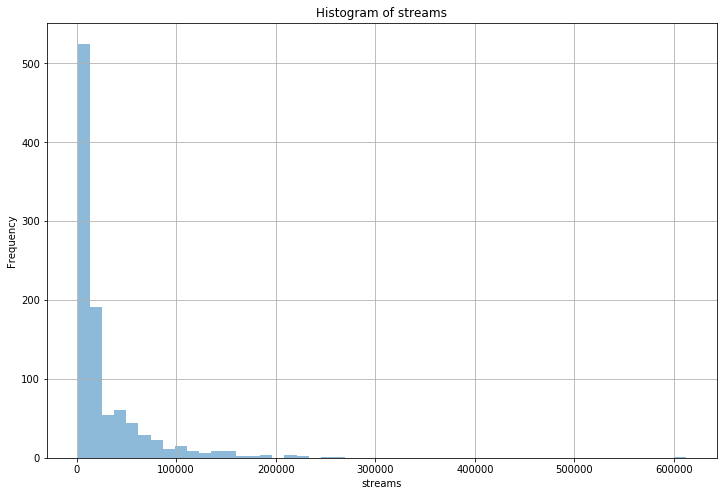

In [125]:
plt.figure(figsize=(12, 8))
plt.hist(pandas_df["streams"], bins=50, alpha=0.5)
plt.title("Histogram of streams")
plt.xlabel("streams")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [158]:
#find the ditribution of popularity 
#the distribution of popularity with 1000 records is skewed to the right 
#this is a unimodal distribution, one distinct peak

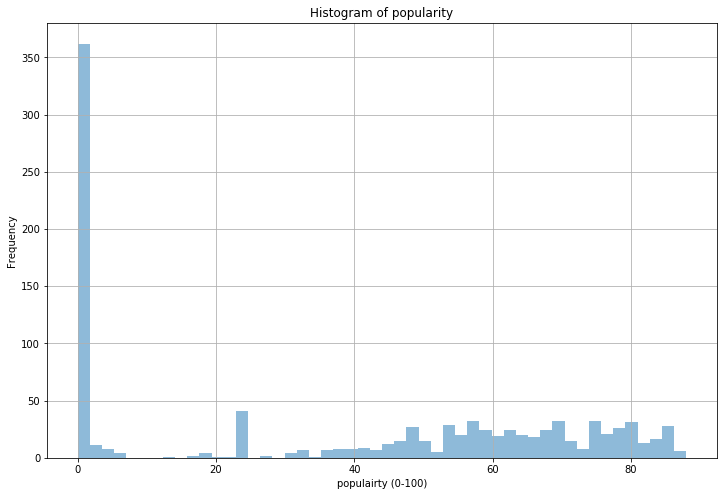

In [119]:
plt.figure(figsize=(12, 8))
plt.hist(pandas_df["popularity"], bins=50, alpha=0.5)
plt.title("Histogram of popularity")
plt.xlabel("populairty (0-100)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [157]:
#find the histogram for duration in miloseconds 
#the distibution follows a normal distribution, not skewed to the left or right 

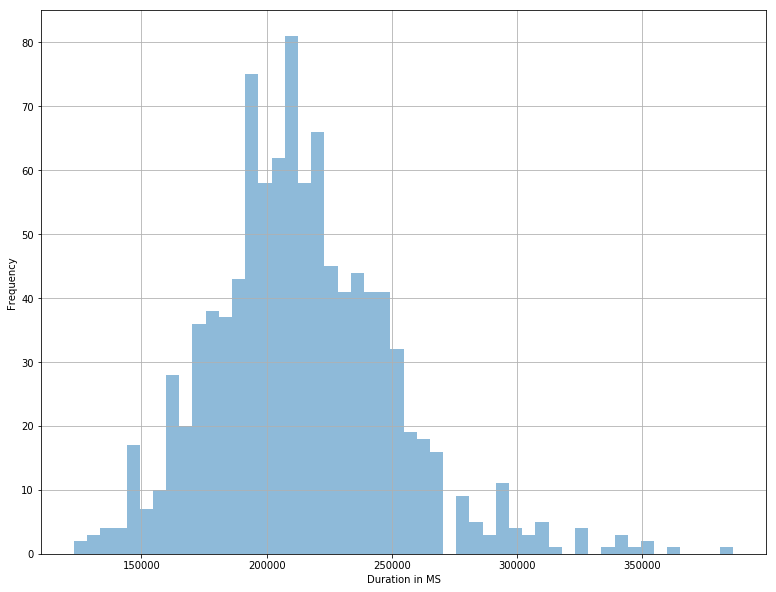

In [108]:
plt.figure(figsize=(13, 10))
plt.hist(pandas_df["duration_ms"], bins=50, alpha=0.5)
plt.xlabel("Duration in MS")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [115]:
#the distribution for the af danceability column is skewed to the left
#there is a multimodal distribution, there are more than two distinct peaks in the distribution 

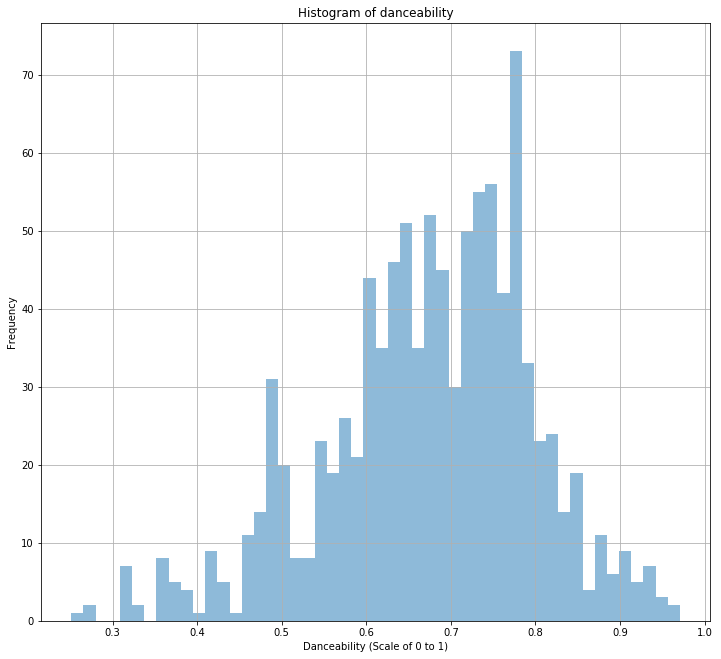

In [111]:
plt.figure(figsize=(12, 11))
plt.hist(pandas_df["af_danceability"], bins=50, alpha=0.5)
plt.title("Histogram of danceability")
plt.xlabel("Danceability (Scale of 0 to 1)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [156]:
#find the histogram for energy 
#the histogram for energy is skewed to the left 
#this is a multi modal distribution, there are more than two distinct peaks in this distribution 

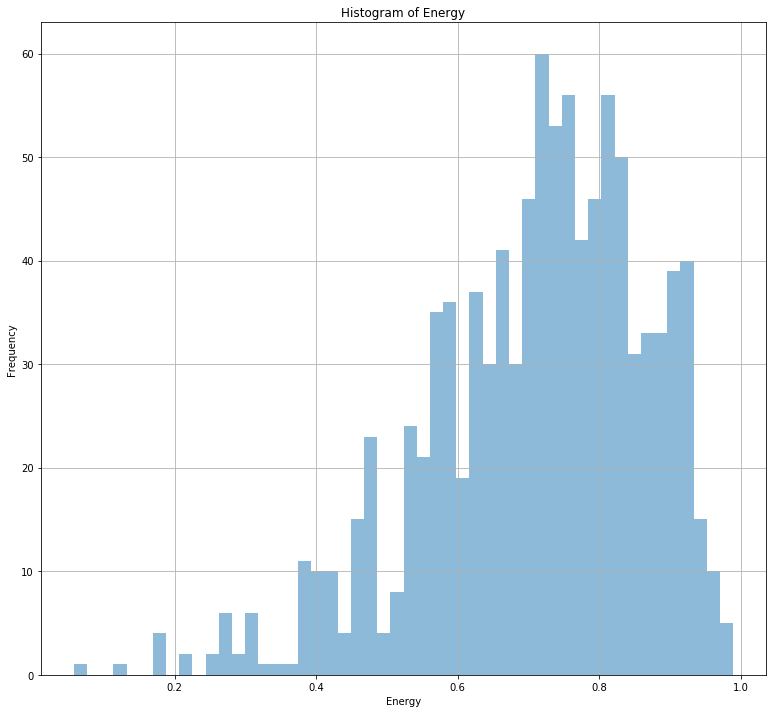

In [117]:
plt.figure(figsize=(13, 12))
plt.hist(pandas_df["af_energy"], bins=50, alpha=0.5)
plt.title("Histogram of Energy")
plt.xlabel("Energy")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [155]:
#find the distribution for af loudness
#the distribution is skewed to the left 
#this is a bimodal distribution, there are two distinct peaks in the distribution 

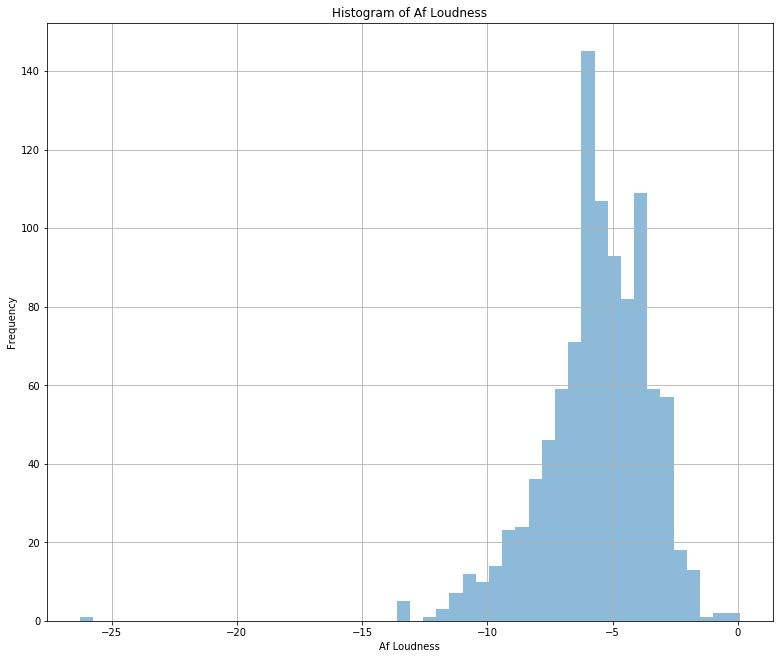

In [130]:
plt.figure(figsize=(13, 11))
plt.hist(pandas_df["af_loudness"], bins=50, alpha=0.5)
plt.title("Histogram of Af Loudness")
plt.xlabel("Af Loudness")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [154]:
#find the distribution for af speechiness 
#the distribution for af speechiness is skewed to the right
#this is a bimodal distribution, there are two distinct peaks 

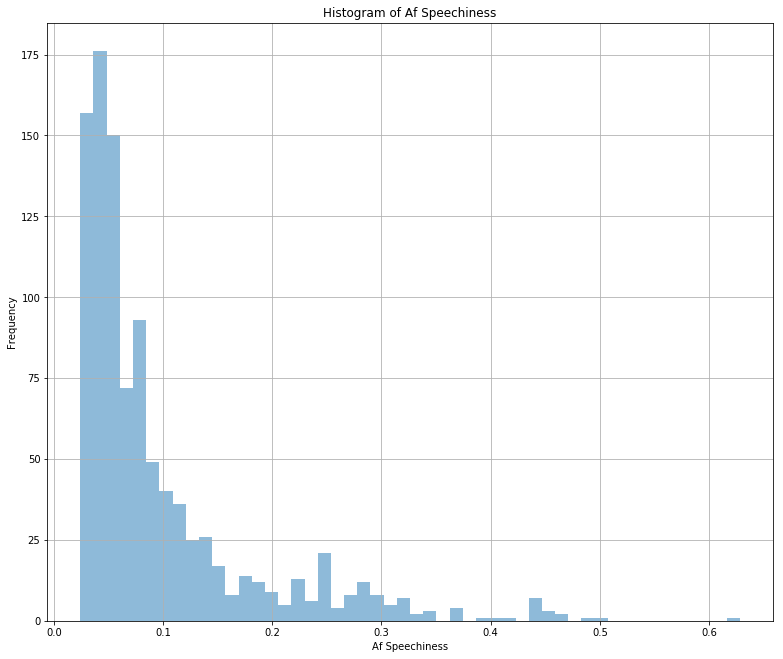

In [132]:
plt.figure(figsize=(13, 11))
plt.hist(pandas_df["af_speechiness"], bins=50, alpha=0.5)
plt.title("Histogram of Af Speechiness")
plt.xlabel("Af Speechiness")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [153]:
#the disitrbution for af acuosticness is skewed to the right 
#this is a unimodal distribution, one distinct peak 

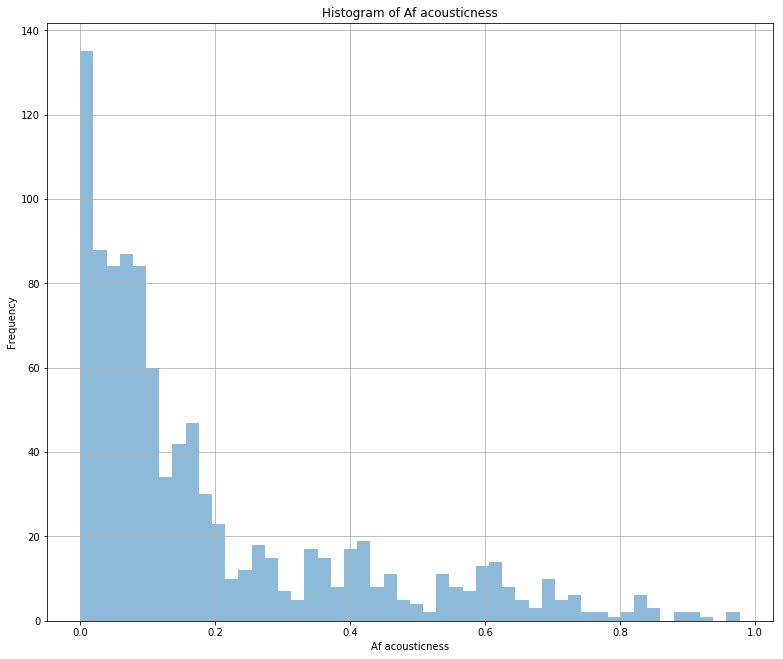

In [133]:
plt.figure(figsize=(13, 11))
plt.hist(pandas_df["af_acousticness"], bins=50, alpha=0.5)
plt.title("Histogram of Af acousticness")
plt.xlabel("Af acousticness")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [152]:
#the distrubtion for af liveness is skewed to the right 
#this is a bimodal distribution, there are two distinct peaks in this distribution 

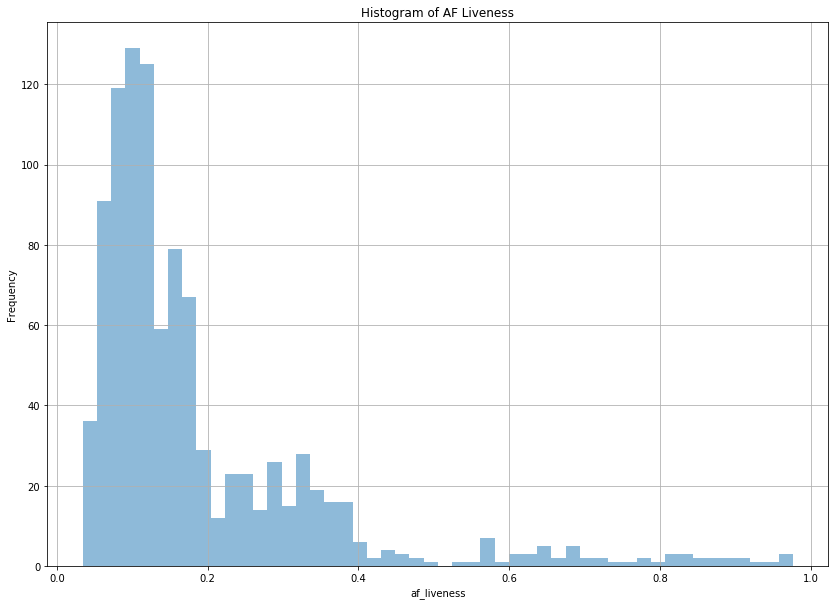

In [138]:
plt.figure(figsize=(14, 10))
plt.hist(pandas_df["af_liveness"], bins=50, alpha=0.5)
plt.title("Histogram of AF Liveness")
plt.xlabel("af_liveness")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [144]:
#the distrubtion isn't skewed in either direction 
#the distribution isn't exactly a normal distribution 
#this is a multimodal distribution, there are more than two distinct peaks in this distribution 

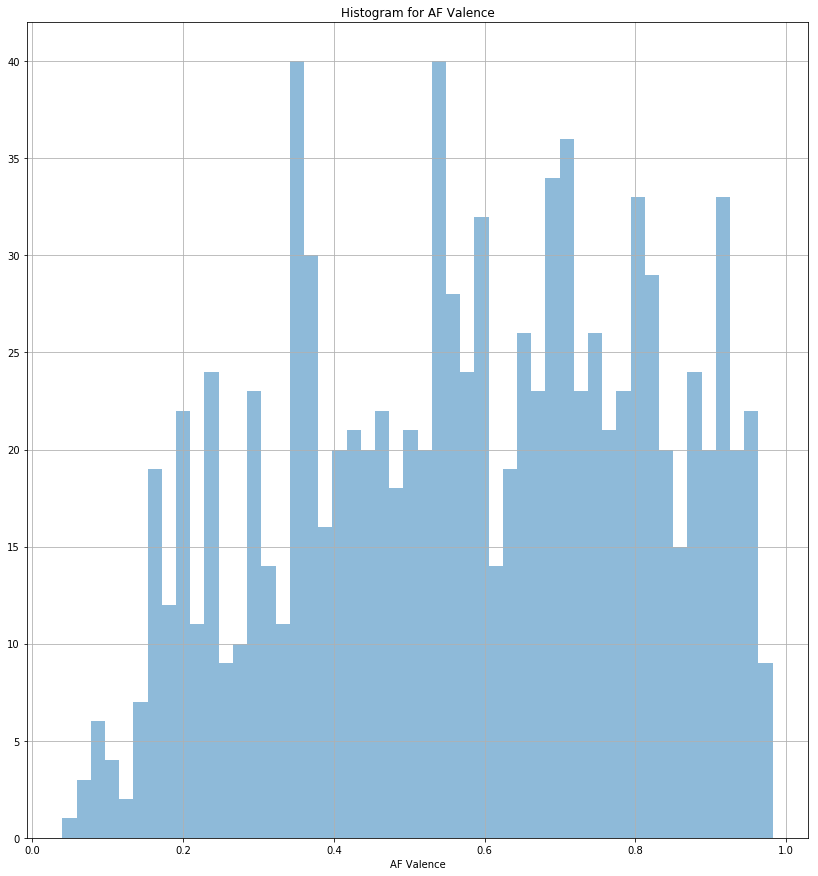

In [145]:
plt.figure(figsize=(14, 15))
plt.title("Histogram for AF Valence")
plt.hist(pandas_df["af_valence"], bins=50, alpha=0.5)
plt.xlabel("AF Valence")
plt.grid(True)
plt.show()

In [150]:
#histogram for af tempo 
#the dsitribution is a multi modal distribution, there are more than two distinct peaks in this distribution 
#not skewed either to the left or right 

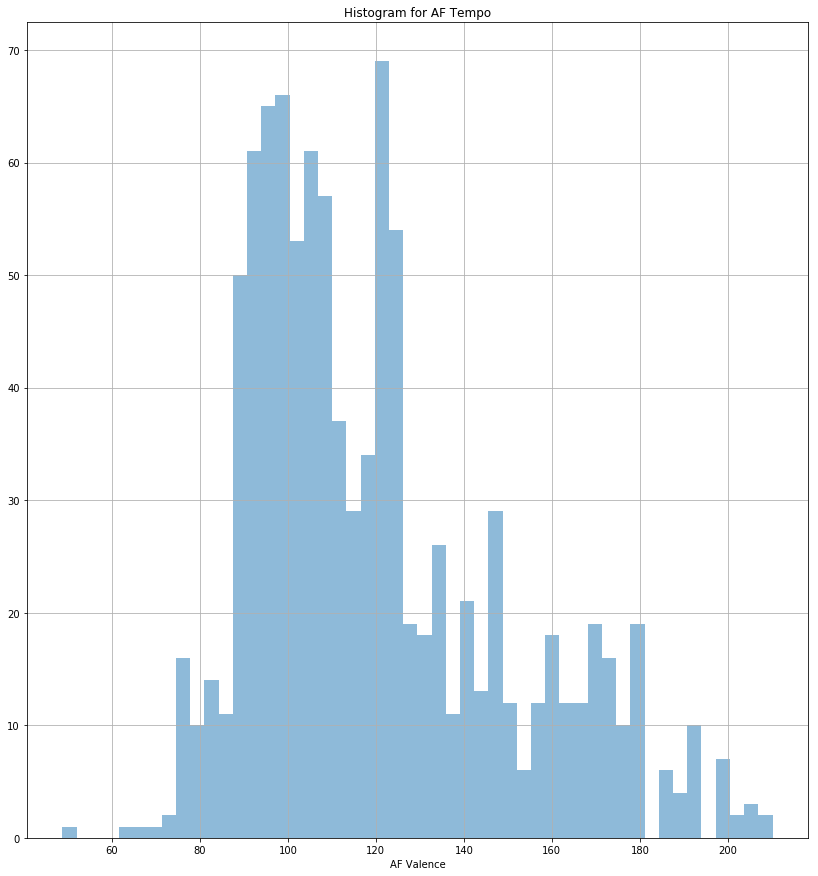

In [151]:
plt.figure(figsize=(14, 15))
plt.title("Histogram for AF Tempo")
plt.hist(pandas_df["af_tempo"], bins=50, alpha=0.5)
plt.xlabel("AF Valence")
plt.grid(True)
plt.show()